# UCI Heart Disease K-Means Project

## Overview - Dori

Our group aim to predict the presence of heart disease by clustering on the heart disease datasets. We chose to cluster the data using Unsupervised Machine Learning Algorithm such as K-means, Principal Component Analysis(PCA), and we will perform K-means after PCA. We will use 80% of heart disease data to train the model since and test with the rest 20% of heart disease data.

## Introduction - Dori
We will use heart disease dataset from UCI repository clustering datasets. For the heart disease datasets, it actually has 76 attributes, but we will only be using 14 attributes. The 14 dimensions, which are: age (in years), sex(1=male, 0=female), dataset( where the dataset come from 3 different places such as: V.A. Medical Center, Long Beach and Cleveland), cp( chest pain type: typical angina, atypical angina, non-anginal pain, asymptomatic), trestbps(resting blood pressure in mm Hg on admission to the hospital), chol(serum cholestoral in mg/dl), fbs(fasting blood sugar > 120 mg/dl), restecg(resting electrocardiographic results), thalch(maximum heart rate achieved), exang(exercise induced angina), oldpeak(ST depression induced by exercise relative to rest), slope(the slope of the peak exercise ST segment), ca(number of major vessels from 0-3 colored by flourosopy), thal(normal, fixed defect, reversable defect), and num(diagnosis of heart disease - angiographic disease status). 

To cluster the data, we will use 2 algorithms which are k-means and principal component analysis(PCA). K-means is a simple but effective algorithm where we will partitions the data in to K cluster and we will update it using iterative batch algorithm. PCA is the simplest method where we will find a linear subspace greatest projected variance and useful to reduced subspace that contains most of the variance

### Imports and Reading CSV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Data Cleaning - Shania/Tiffany
Removing categorical variables and id

Removing entries with missing data

Splitting data into 80-20 Train and Test
   

In [3]:
df = df.drop(columns='id', axis=2)
# checking columns with the most frequent null values
df.isna().sum()

age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [4]:
# dropping columns with the most null values
df = df.drop(columns=['ca', 'slope', 'thal'], axis=1)

In [5]:
# checking data frame information after dropping null columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 12 columns):
age         920 non-null int64
sex         920 non-null object
dataset     920 non-null object
cp          920 non-null object
trestbps    861 non-null float64
chol        890 non-null float64
fbs         830 non-null object
restecg     918 non-null object
thalch      865 non-null float64
exang       865 non-null object
oldpeak     858 non-null float64
num         920 non-null int64
dtypes: float64(4), int64(2), object(6)
memory usage: 86.4+ KB


In [6]:
# dropping columns with categorical values
df = df.drop(columns= df.select_dtypes(['object']).columns, axis=1)

In [7]:
# checking data frame information after dropping categorical columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 6 columns):
age         920 non-null int64
trestbps    861 non-null float64
chol        890 non-null float64
thalch      865 non-null float64
oldpeak     858 non-null float64
num         920 non-null int64
dtypes: float64(4), int64(2)
memory usage: 43.2 KB


In [8]:
# dropping rows containing null values
df = df.dropna()

In [9]:
# checking final dataframe form after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 827 entries, 0 to 919
Data columns (total 6 columns):
age         827 non-null int64
trestbps    827 non-null float64
chol        827 non-null float64
thalch      827 non-null float64
oldpeak     827 non-null float64
num         827 non-null int64
dtypes: float64(4), int64(2)
memory usage: 45.2 KB


In [10]:
# standardizing dataset
X = df.drop(['num'], axis=1)
y = df['num']
col = X.columns

# perform standard scaler
scale = StandardScaler()
X = pd.DataFrame(scale.fit_transform(X[col]))
X.columns = col
X

,age,trestbps,chol,thalch,oldpeak
0,1.050186,0.679000,0.291349,0.474814,1.295742
1,1.478336,1.467744,0.773058,-1.152115,0.564039
2,1.478336,-0.635573,0.254994,-0.338651,1.570131
3,-1.732793,-0.109744,0.445860,1.908061,2.393296
4,-1.304643,-0.109744,0.027772,1.327015,0.472576
5,0.300922,-0.635573,0.318616,1.559433,-0.076201
6,0.943148,0.416085,0.609459,0.862178,2.484759
7,0.407960,-0.635573,1.391101,0.978387,-0.259126
8,1.050186,-0.109744,0.482215,0.358605,0.472576
9,-0.020191,0.416085,0.018683,0.668496,2.027445


In [11]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)

## K - Means - Cory
Running K-means with K=5 (num column [0=no heart disease; 1,2,3,4 = stages of heart disease

-dependent variables are trestbps, chol, thalch, oldpeak, ca  -> want to see how grouped  
-predictions (Y) are num column: diff levels of heart disease

* trestbps - resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol - (serum cholesterol in mg/dl)
* thalach - maximum heart rate achieved
* oldpeak - ST depression induced by exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy

In [12]:
def calcSqDistances(X, Kmus):
    # k number of Kmus
    #need to find minimum distance from X[][] to Kmus
    #need to find closest Kmus and calulate distance
    dist = np.zeros((np.shape(X)[0],np.shape(Kmus)[0]))
    for k in range(0,Kmus.shape[0]):
        for n in range(0,X.shape[0]): # changed from 0
            dist[n][k] = (X[n][0]-Kmus[k][0])**2 + (X[n][1]-Kmus[k][1])**2 + (X[n][2]-Kmus[k][2])**2 + (X[n][3]-Kmus[k][3])**2 + (X[n][4]-Kmus[k][4])**2
    return dist

In [13]:
def determineRnk(sqDmat):
    m = np.argmin(sqDmat, axis=1)
    return np.eye(sqDmat.shape[1])[m] 

In [14]:
def recalcMus(X, Rnk):
    # need K newMus
    # rnk gives us our binary Rnk matrix saying which points are closest to oldMus
    # initialize newMu array to dimension of K columns (usually 2x2)
    return (np.divide(X.T.dot(Rnk), np.sum(Rnk, axis=0))).T

In [15]:
X = X.to_numpy()
y = y.to_numpy()

In [16]:
# k-means algorithm
def runKMeans(K,X):
    # Determine and store data set information
    N = np.shape(X)[0]
    D = np.shape(X)[1]

    # Allocate space for the K mu vectors
    Kmus = np.zeros((K, D))

    # Initialize cluster centers by randomly picking points from the data
    rndinds = np.random.permutation(N)
    Kmus = X[rndinds[:K]];

    # Specify the maximum number of iterations to allow
    maxiters = 1000;

    for iter in range(maxiters):
        # Assign each data vector to closest mu vector as per Bishop (9.2)
        # Do this by first calculating a squared distance matrix where the n,k entry
        # contains the squared distance from the nth data vector to the kth mu vector

        # sqDmat will be an N-by-K matrix with the n,k entry as specfied above
        sqDmat = calcSqDistances(X, Kmus);
        # given the matrix of squared distances, determine the closest cluster
        # center for each data vector 

        # R is the "responsibility" matrix
        # R will be an N-by-K matrix of binary values whose n,k entry is set as 
        # per Bishop (9.2)
        # Specifically, the n,k entry is 1 if point n is closest to cluster k,
        # and is 0 otherwise
        Rnk = determineRnk(sqDmat)

        KmusOld = Kmus
        #plotCurrent(X, Rnk, Kmus)
        #plt.show()

        # Recalculate mu values based on cluster assignments as per Bishop (9.4)
        Kmus = recalcMus(X, Rnk)
        
        # Check to see if the cluster centers have converged.  If so, break.
        if sum(abs(KmusOld.flatten() - Kmus.flatten())) < 1e-6:
            break
            
    return Rnk, Kmus
    # now we have 5 cluster centers
    # we want to see if each num=1's are in the same cluster as expected or not
    # Rnk shows us where each datapoint is closest to which cluster
   

In [17]:
Rnk, Kmus = runKMeans(5,X)
kmeans_labels_pre = runKMeans(5, X)
# matrix to tell us which cluster is for what num 
# how accurate k-means was based on distribution of numbers
count = np.zeros((5,5))
    
for col in range(0,Rnk.shape[1]):
    for row in range(0,Rnk.shape[0]):
        if (Rnk[row][col] == 1):
            if (y[row] == 0):
                count[0][col] += 1
            elif (y[row] == 1):
                count[1][col] += 1
            elif (y[row] == 2):
                count[2][col] += 1
            elif (y[row] == 3):
                count[3][col] += 1
            elif (y[row] == 4):
                count[4][col] += 1
count

array([[ 84.,  28.,  68., 176.,  15.],
       [ 48.,  54.,  56.,  36.,  50.],
       [ 10.,  29.,  18.,   6.,  36.],
       [  6.,  29.,  20.,   4.,  30.],
       [  0.,  12.,   6.,   0.,   6.]])

Count matrix rows are for num (diff levels of heart disease) and columns are for 5 cluster centers from K-means.

We assume that if data was clustered well, each cluster would have only one num associated with it. Results of count matrix shows that the K-means did not do that well since cluster numbers are distributed across different nums.

## PCA - Shahab

In [18]:
def eigsort(V, eigvals):
    # Sort the eigenvalues from largest to smallest. Store the sorted
    # eigenvalues in the column vector lambd.
    lohival = np.sort(eigvals)
    lohiindex = np.argsort(eigvals)
    lambd = np.flip(lohival)
    index = np.flip(lohiindex)
    Dsort = np.diag(lambd)

    # Sort eigenvectors to correspond to the ordered eigenvalues. Store sorted
    # eigenvectors as columns of the matrix vsort.
    M = np.size(lambd)
    Vsort = np.zeros((M, M))
    for i in range(M):
        Vsort[:,i] = V[:,index[i]]
    return Vsort, Dsort

In [19]:
x = X # maybe wanna change to just X since not using training -> x = X
x = x.T
print("Data shape:", x.shape)

#finds the mean of each dimension
mean = np.mean(x, axis=1).reshape(5,1)
print("Mean shape:", mean.shape)

# calcuclates the matrix of mean subtracted points
Z = x - mean
print("mean subtracted data:", Z.shape)

# calculates the covariance matrix
covmatrix = 1/(len(x[0]))*np.matmul(Z,Z.T)
print("covmatrix:", covmatrix.shape)

#calculates eigenvalues
eigvals, V = np.linalg.eig(covmatrix)
sortV, sortD = eigsort(V, eigvals)

#transforms the entire dataset using all principal components
transform = np.matmul(sortV.T, Z)
print("All PCA:", transform.shape)

#transforms the entire dataset using top 2 principal components
best2 = np.matmul(sortV[:,0:2], Z[0:2])
print("2 PCA: ", best2.shape)

#trying to reduce dimensionality with top 2 principal components
reduced = np.matmul(sortV[0:2,0:2], Z[0:2])
print("reduced to 2?:", reduced.shape)

Data shape: (5, 827)
Mean shape: (5, 1)
mean subtracted data: (5, 827)
covmatrix: (5, 5)
All PCA: (5, 827)
2 PCA:  (5, 827)
reduced to 2?: (2, 827)


## K-Means after PCA - Cory

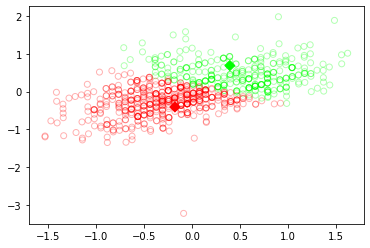

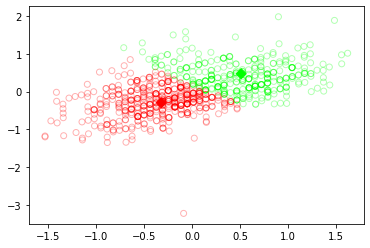

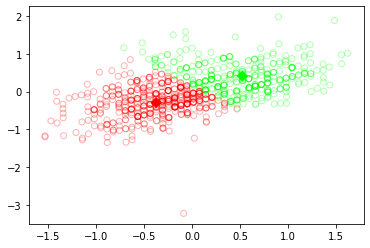

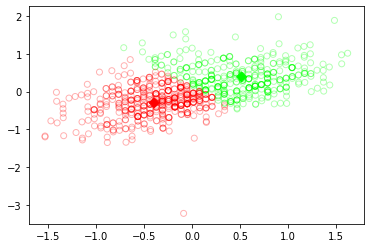

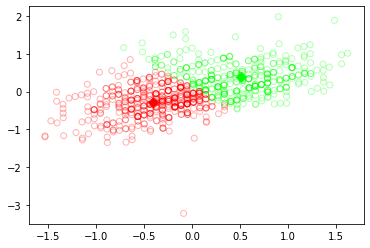

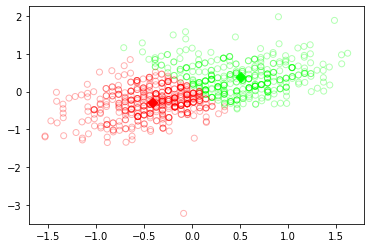

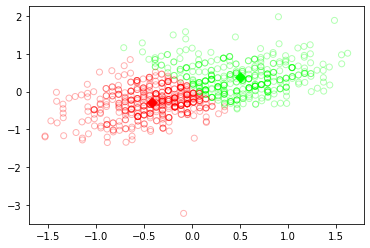

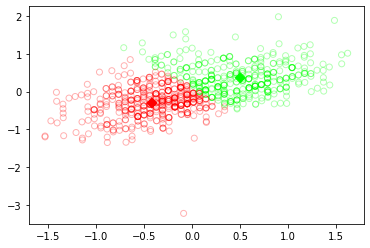

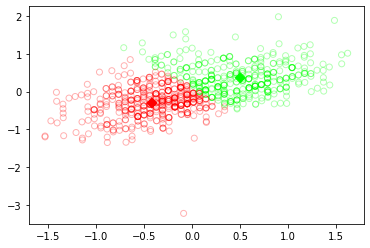

In [20]:
# apply k-means to reduced matrix
X_reduced = reduced.T

def calcSqDistances(X, Kmus):
    
    dist = np.zeros((np.shape(X)[0],np.shape(Kmus)[0]))
    for k in range(0,Kmus.shape[0]):
        for n in range(0,X.shape[0]): # changed from 0
            dist[n][k] = (X[n][0]-Kmus[k][0])**2 + (X[n][1]-Kmus[k][1])**2
    return dist

def plotCurrent(X, Rnk, Kmus):
    N, D = np.shape(X)
    K = np.shape(Kmus)[0]

    InitColorMat = np.matrix([[1, 0, 0], 
                              [0, 1, 0],   
                              [0, 0, 1],
                              [0, 0, 0],
                              [1, 1, 0], 
                              [1, 0, 1], 
                              [0, 1, 1]])

    KColorMat = InitColorMat[0:K]
    colorVec = Rnk.dot(KColorMat)
    muColorVec = np.eye(K).dot(KColorMat)

    plt.scatter(X[:,0], X[:,1], edgecolors=colorVec, marker='o', facecolors='none', alpha=0.3)
    plt.scatter(Kmus[:,0], Kmus[:,1], c=muColorVec, marker='D', s=50);

def runKMeans(K, X):
    # Determine and store data set information
    N = np.shape(X)[0]
    D = np.shape(X)[1]

    # Allocate space for the K mu vectors
    Kmus = np.zeros((K, D))

    # Initialize cluster centers by randomly picking points from the data
    rndinds = np.random.permutation(N)
    Kmus = X[rndinds[:K]];

    # Specify the maximum number of iterations to allow
    maxiters = 1000;

    for iter in range(maxiters):
        # sqDmat will be an N-by-K matrix with the n,k entry as specfied above
        sqDmat = calcSqDistances(X, Kmus);
        
        Rnk = determineRnk(sqDmat)
        
        KmusOld = Kmus
        plotCurrent(X, Rnk, Kmus)
        plt.show()

        # Recalculate mu values based on cluster assignments as per Bishop (9.4)
        Kmus = recalcMus(X, Rnk)

        # Check to see if the cluster centers have converged.  If so, break.
        if sum(abs(KmusOld.flatten() - Kmus.flatten())) < 1e-6:
            break

    return plotCurrent(X,Rnk,Kmus)

kmeans_labels_post = runKMeans(2, X_reduced)

(827, 5)


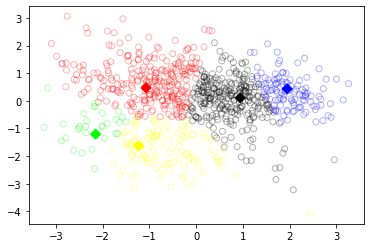

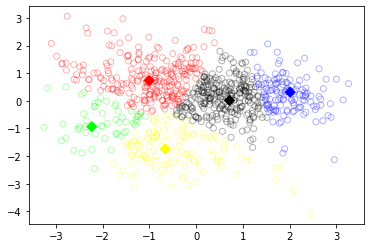

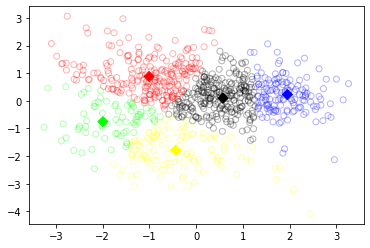

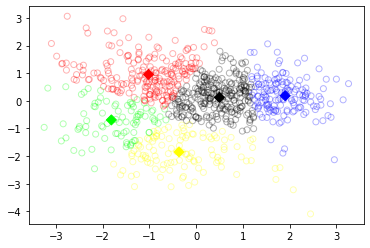

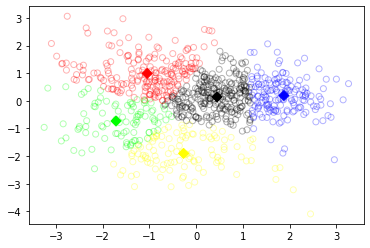

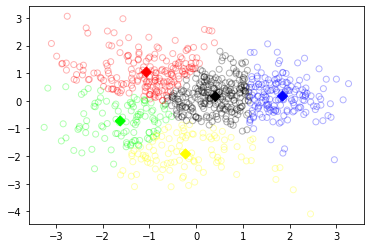

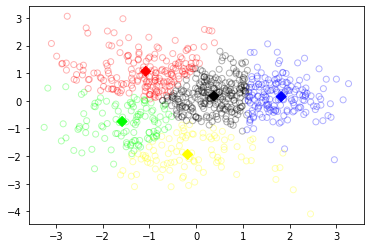

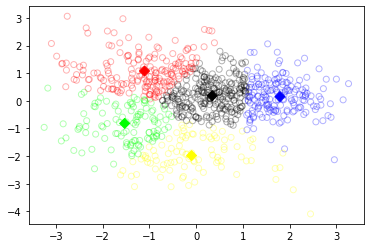

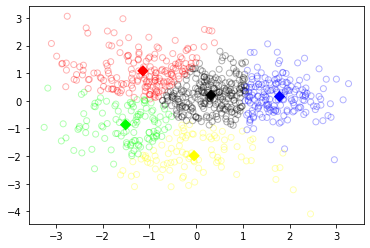

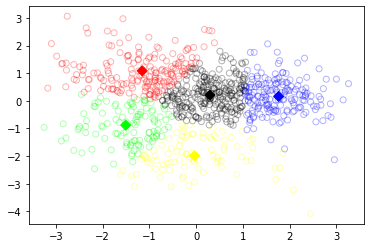

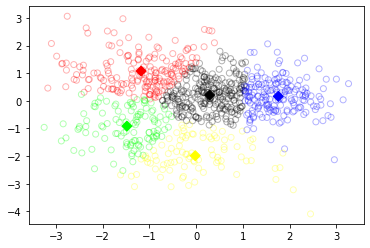

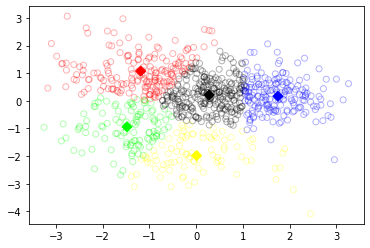

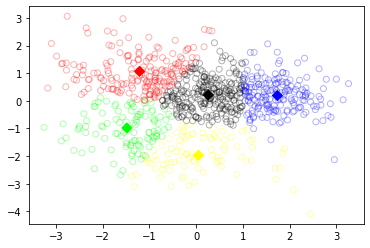

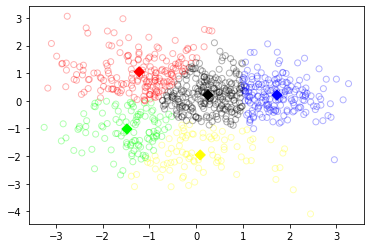

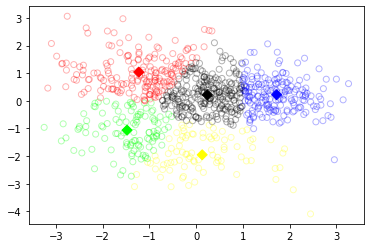

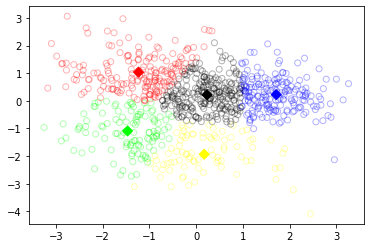

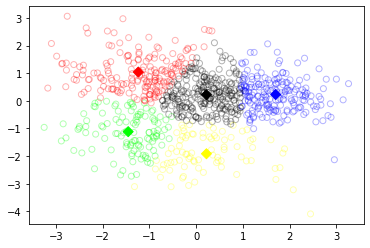

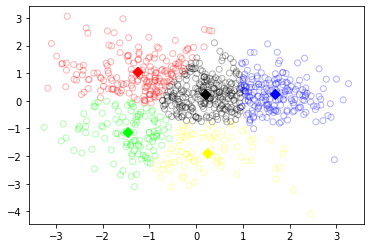

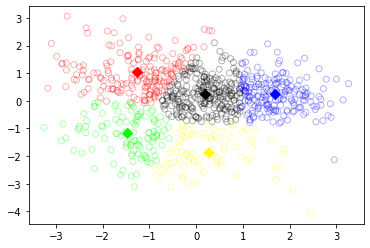

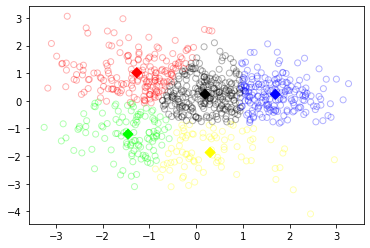

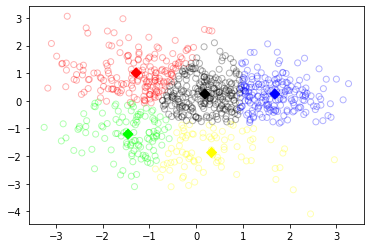

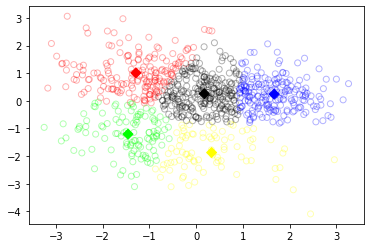

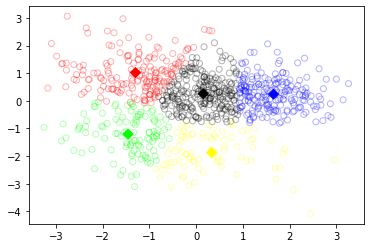

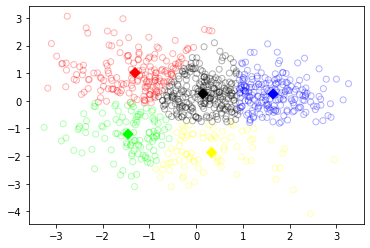

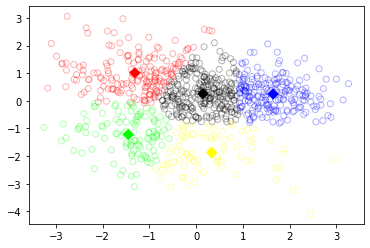

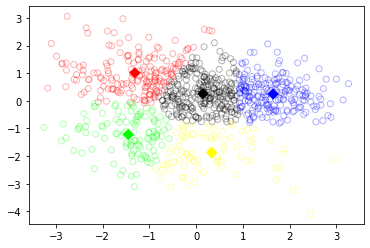

In [27]:
print(transform.T.shape)
runKMeans(5, transform.T)

## Comparative Data Analysis - Shadman
Run test set on our k-means to get accuracies. Compare these accuracies as well as runtimes

In [21]:
from sklearn.metrics import accuracy_score

labels = np.array(df.get('num'))

def accuracy(kmeans_labels, real_labels):
    same = np.sum(kmeans_labels == labels) / len(labels)
    different = np.sum(kmeans_labels != labels) / len(labels)
    accuracy = max(same, different)
    print("Accuracy:", accuracy)

In [22]:
import warnings
warnings.filterwarnings("ignore")

In [23]:
%%time
    
accuracy(kmeans_labels_pre, y)

Accuracy: 0.0012091898428053204
CPU times: user 531 µs, sys: 0 ns, total: 531 µs
Wall time: 467 µs


In [24]:
%%time

accuracy(kmeans_labels_post, y)

Accuracy: 1.0
CPU times: user 510 µs, sys: 0 ns, total: 510 µs
Wall time: 401 µs


## Conclusion - Dori